In [158]:
#importing all important libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import auc_score, precision_at_k, recall_at_k
from lightfm import LightFM
from skopt import forest_minimize


import time
import datetime as dt


from collections import Counter
import pandas_profiling as pp
# data preprocessing


C:\Users\xavil\anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [82]:
df = pd.read_csv("retail.csv")

In [83]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [84]:
df.info()
df.head().append(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [85]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [86]:
# checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [87]:
df.dropna(axis = 0, inplace = True)
print(df.shape)   #removing the null values

(406829, 8)


<AxesSubplot:>

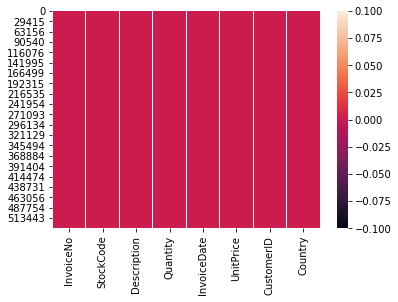

In [88]:
sns.heatmap(df.isnull())

In [89]:
pp.ProfileReport(df)

In [90]:
#Variables


In [91]:
df_1 = df[df['Quantity']>=0]
df_1 = df_1[df_1['UnitPrice']>=0]

print(df_1.shape)

(397924, 8)


In [92]:
df_1['TotalQuantity'] = df_1['Quantity']*df_1['UnitPrice']
df_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


<AxesSubplot:>

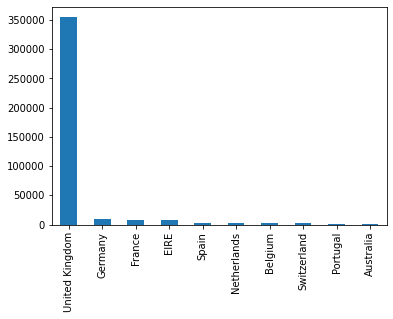

In [93]:
#top countries 
df_1['Country'].value_counts().head(10).plot(kind='bar')

In [94]:
df_1[df_1['TotalQuantity']==df_1['TotalQuantity'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.6


In [95]:
items = df_1['Description'].value_counts().head()
print(items)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
Name: Description, dtype: int64


In [96]:
print(df_1[['InvoiceNo','Country','CustomerID','TotalQuantity']].sort_values('TotalQuantity',ascending = False).head(15))

       InvoiceNo         Country  CustomerID  TotalQuantity
540421    581483  United Kingdom     16446.0      168469.60
61619     541431  United Kingdom     12346.0       77183.60
222680    556444  United Kingdom     15098.0       38970.00
173382    551697  United Kingdom     16029.0        8142.75
348325    567423  United Kingdom     17450.0        7144.72
160546    550461  United Kingdom     15749.0        6539.40
52711     540815  United Kingdom     15749.0        6539.40
421601    573003     Netherlands     14646.0        4992.00
52709     540815  United Kingdom     15749.0        4921.50
160542    550461  United Kingdom     15749.0        4632.00
52772     540818  United Kingdom     15749.0        4522.50
244419    558526  United Kingdom     17949.0        4401.00
160544    550461  United Kingdom     15749.0        4254.50
291249    562439  United Kingdom     12931.0        4176.00
422351    573077          France     12536.0        4161.06


In [97]:
print(df_1[['InvoiceNo','Country','CustomerID','TotalQuantity']].sort_values('TotalQuantity',ascending = False).head(15))

       InvoiceNo         Country  CustomerID  TotalQuantity
540421    581483  United Kingdom     16446.0      168469.60
61619     541431  United Kingdom     12346.0       77183.60
222680    556444  United Kingdom     15098.0       38970.00
173382    551697  United Kingdom     16029.0        8142.75
348325    567423  United Kingdom     17450.0        7144.72
160546    550461  United Kingdom     15749.0        6539.40
52711     540815  United Kingdom     15749.0        6539.40
421601    573003     Netherlands     14646.0        4992.00
52709     540815  United Kingdom     15749.0        4921.50
160542    550461  United Kingdom     15749.0        4632.00
52772     540818  United Kingdom     15749.0        4522.50
244419    558526  United Kingdom     17949.0        4401.00
160544    550461  United Kingdom     15749.0        4254.50
291249    562439  United Kingdom     12931.0        4176.00
422351    573077          France     12536.0        4161.06


In [98]:
print(df_1[['InvoiceNo','Country','CustomerID','TotalQuantity']].sort_values('TotalQuantity',ascending = False).head(15))

       InvoiceNo         Country  CustomerID  TotalQuantity
540421    581483  United Kingdom     16446.0      168469.60
61619     541431  United Kingdom     12346.0       77183.60
222680    556444  United Kingdom     15098.0       38970.00
173382    551697  United Kingdom     16029.0        8142.75
348325    567423  United Kingdom     17450.0        7144.72
160546    550461  United Kingdom     15749.0        6539.40
52711     540815  United Kingdom     15749.0        6539.40
421601    573003     Netherlands     14646.0        4992.00
52709     540815  United Kingdom     15749.0        4921.50
160542    550461  United Kingdom     15749.0        4632.00
52772     540818  United Kingdom     15749.0        4522.50
244419    558526  United Kingdom     17949.0        4401.00
160544    550461  United Kingdom     15749.0        4254.50
291249    562439  United Kingdom     12931.0        4176.00
422351    573077          France     12536.0        4161.06


# 2. Data preprocessing

In [99]:
df.dropna(inplace=True)

In [100]:
round(100*(df.isnull().sum())/len(df), 2)


InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [101]:
#Formatting 'CustomerID' and 'InvoiveDate'
df['CustomerID'] = df['CustomerID'].astype('int')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],infer_datetime_format=True)

In [102]:
#Generating 'Amount' column using 'Quantity' & 'UnitPrice'
df['Amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [103]:
#Calculating RFM metrics

In [104]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [105]:
# Calculating Monetary attribute
cus_data = df.groupby('CustomerID')[['Amount']].sum() # Total amount spent
cus_data.rename(columns={'Amount':'Monetary'},inplace=True)
cus_data.head()

,Monetary
CustomerID,
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [106]:
#Frequency- Total number of transactions made by customer or average time between transactions.
# Calculating frequency attribute
cus_data['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].count()
cus_data.head()

,Monetary,Frequency
CustomerID,,
12346,0.00,2
12347,4310.00,182
12348,1797.24,31
12349,1757.55,73
12350,334.40,17


In [107]:
#Recency - Time since last order or engaged with product.
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [108]:
df['diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00


In [109]:
import datetime as dt

cus_data['Recency'] = df.groupby('CustomerID')['diff'].min().dt.days
cus_data = cus_data.reset_index()
cus_data.head()

,CustomerID,Monetary,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


## Outliers

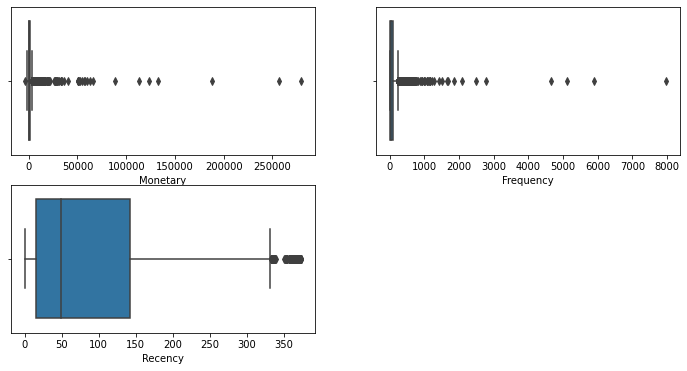

In [110]:
num_features = cus_data.columns[1:]
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(12,6))

for n,i in enumerate(num_features):
    sns.boxplot(x=i, data=cus_data,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()



In [111]:
h_cap = 0.95
h_cap_val = cus_data['Monetary'].quantile(h_cap)
cus_data['Monetary'][cus_data['Monetary'] > h_cap_val] = h_cap_val
l_cap = 0.05
l_cap_val = cus_data['Monetary'].quantile(l_cap)
cus_data['Monetary'][cus_data['Monetary'] < l_cap_val] = l_cap_val


<ipython-input-111-346be0c2ab85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_data['Monetary'][cus_data['Monetary'] > h_cap_val] = h_cap_val
<ipython-input-111-346be0c2ab85>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_data['Monetary'][cus_data['Monetary'] < l_cap_val] = l_cap_val


In [36]:
cap = 0.95
cap_val = cus_data['Frequency'].quantile(cap)
cus_data['Frequency'][cus_data['Frequency'] > cap_val] = cap_val

<ipython-input-36-f2cfdfce3943>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_data['Frequency'][cus_data['Frequency'] > cap_val] = cap_val


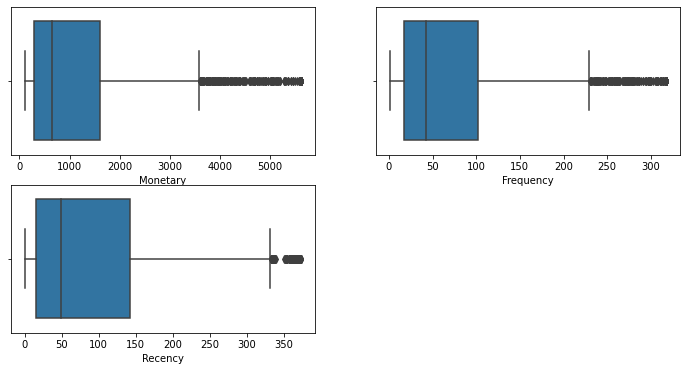

In [37]:
num_features = cus_data.columns[1:]
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(12,6))

for n,i in enumerate(num_features):
    sns.boxplot(x=i, data=cus_data,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()


In [39]:
#Creating pipeline for feature scaling and
#dimensionality reduction

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

In [40]:
X = cus_data.drop('CustomerID',axis=1)
X_scaled = pd.DataFrame(preprocessor.fit_transform(X),columns=['PC_1','PC_2'])

# 4. Cluster assignment using K-means clustering

In [41]:
#Elbow

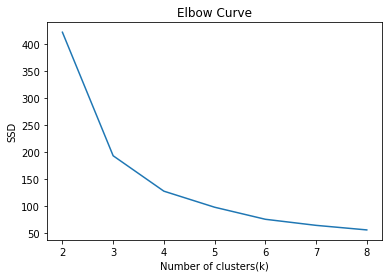

In [44]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters,ssd)
plt.xlabel('Number of clusters(k)')
plt.ylabel('SSD')
plt.title('Elbow Curve')
plt.show()

In [58]:
#Silhouette Analysis

In [67]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, round(silhouette_avg,2)))

For n_clusters=2, the silhouette score is 0.62
For n_clusters=3, the silhouette score is 0.65
For n_clusters=4, the silhouette score is 0.82
For n_clusters=5, the silhouette score is 0.75
For n_clusters=6, the silhouette score is 0.72
For n_clusters=7, the silhouette score is 0.64
For n_clusters=8, the silhouette score is 0.48


In [68]:
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=1)
kmeans.fit(X_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=1)

In [69]:
X_scaled['cluster_id'] = kmeans.labels_
X['cluster_id'] = kmeans.labels_

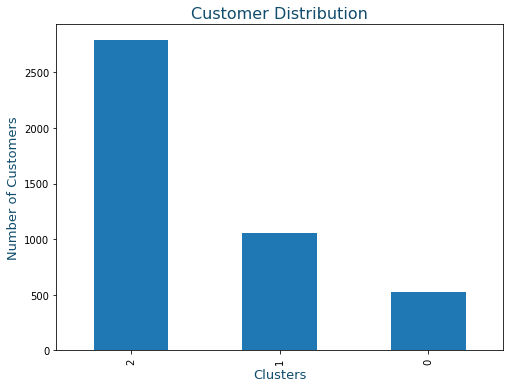

In [70]:
#3 types
font_title = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 16,
        }


font_label = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 13,
        }
plt.figure(figsize=(8,6))
ax = X_scaled['cluster_id'].value_counts().plot(kind='bar')
ax.set_ylabel('Number of Customers',font_label)
ax.set_xlabel('Clusters',font_label)
ax.set_title("Customer Distribution",font_title)
plt.show()

In [63]:
#4 types
kmeans = KMeans(n_clusters=4, max_iter=50,random_state=1)
kmeans.fit(X_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=1)

In [64]:
X_scaled['cluster_id'] = kmeans.labels_
X['cluster_id'] = kmeans.labels_

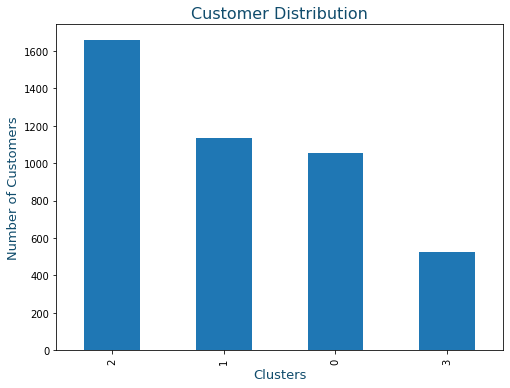

In [66]:
font_title = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 16,
        }


font_label = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 13,
        }
plt.figure(figsize=(8,6))
ax = X_scaled['cluster_id'].value_counts().plot(kind='bar')
ax.set_ylabel('Number of Customers',font_label)
ax.set_xlabel('Clusters',font_label)
ax.set_title("Customer Distribution",font_title)
plt.show()

# Use 3 types

In [71]:
#Clustering profiling using rfm

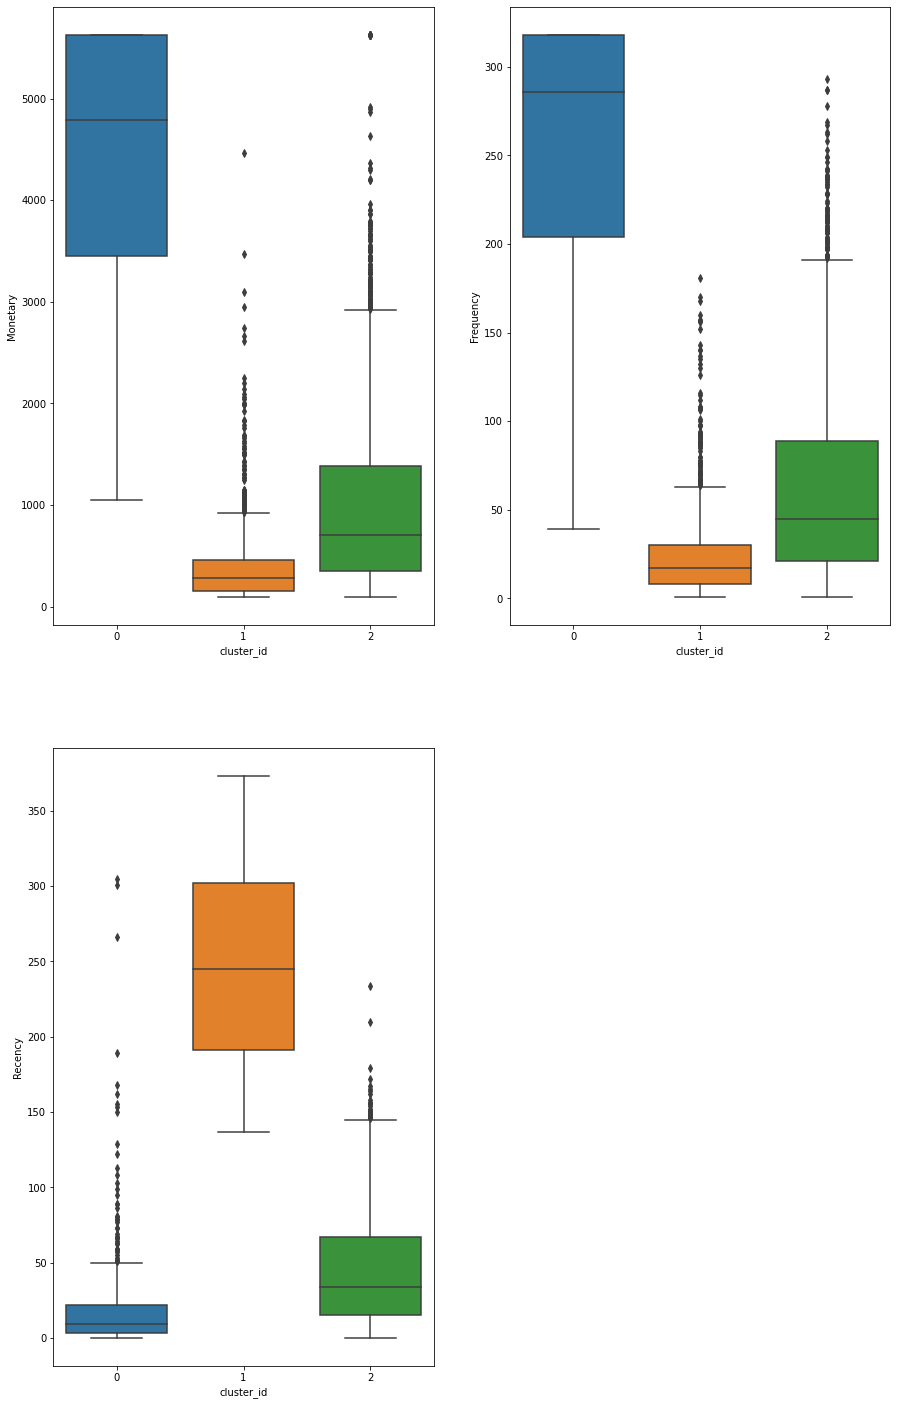

In [74]:
cols = X.columns[0:-1].tolist()
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(15,25))

for n,i in enumerate(cols):
    sns.boxplot(x='cluster_id',y=cols[n], data=X,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

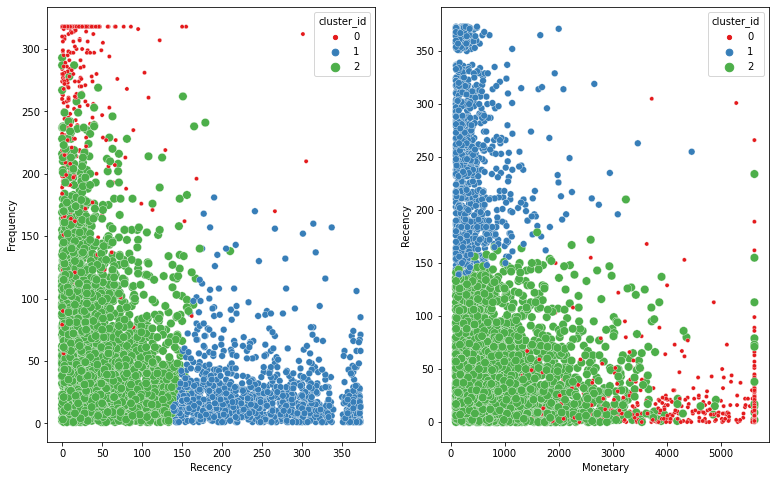

In [80]:
fig = plt.figure(figsize=[20,8])

plt.subplot(1,3,1)
sns.scatterplot(data=X,x="Recency",y="Frequency",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,2)
'''sns.scatterplot(data=X,x="Frequency",y="Monetary",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,3)'''
sns.scatterplot(data=X,x="Monetary",y="Recency",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

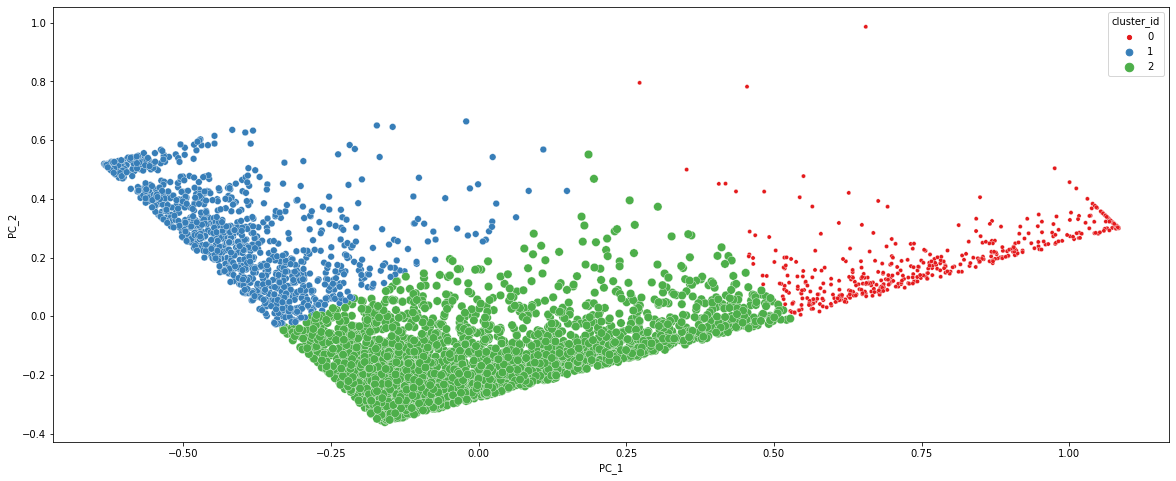

In [76]:
#Visualizing using pca
fig = plt.figure(figsize=[20,8])

sns.scatterplot(data=X_scaled,x="PC_1",y="PC_2",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

In [77]:
#In Cluster id 0, worse revenue clients and not frequent. They can be like one-time customers

In [78]:
#Cluster id 1 has the most loyal customers, with the highest revenue value and with a lot in frequency

In [79]:
#Cluster id 2 are frequent but revenue genetation is not as high as id1 but are promissing 

In [112]:
#Recomendation system

In [115]:
df = df[~df["InvoiceNo"].str.contains("C", na = False)]

In [116]:
df=df.dropna()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0 days 00:00:00


In [120]:
prod = df[['StockCode','Description','UnitPrice']]
prod=prod.drop_duplicates()
prod.shape

(8916, 3)

In [122]:
prod['UnitPrice']=prod['UnitPrice'].astype('float64')

In [130]:
prod=prod.drop_duplicates(subset=['StockCode']).reset_index()
prod['ProductID']=prod['index']
prod=prod[['ProductID','Description','UnitPrice','StockCode']]
dicty=pd.Series(prod.ProductID.values,index=prod.StockCode).to_dict()

In [132]:
customers=df[['CustomerID','Country','StockCode','Quantity']]
customers['ProductID']=customers['StockCode'].map(dicty)

<ipython-input-132-ee684a12c6ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['ProductID']=customers['StockCode'].map(dicty)


In [133]:
customers.isna().sum()

CustomerID    0
Country       0
StockCode     0
Quantity      0
ProductID     0
dtype: int64

In [152]:
interaction_prod = pd.pivot_table(customers, index='CustomerID', columns='ProductID', values='Quantity')
interaction_prod = interaction_prod.fillna(0)
customerid = list(interaction_prod.index)
user_dict = {}
counter = 0 
for i in customerid:
    user_dict[i] = counter
    counter += 1

In [153]:
interaction_prod_csr = scipy.sparse.csr_matrix(interaction_prod.values)
interaction_prod_csr

<4339x3665 sparse matrix of type '<class 'numpy.float64'>'
	with 266802 stored elements in Compressed Sparse Row format>

In [166]:
item_dict ={}
df = prod[['ProductID', 'Description']].sort_values('ProductID')
for i in range(df.shape[0]):
    item_dict[(df.loc[i,'ProductID'])] = df.loc[i,'Description']

products_csr = scipy.sparse.csr_matrix(prod.drop(['ProductID','Description'], axis=1).values)

products_csr

TypeError: no supported conversion for types: (dtype('O'),)

In [167]:
item_dict[0]
user_dict[17850.0]

4017

In [154]:
prod

,ProductID,Description,UnitPrice,StockCode
0,0,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123A
1,1,WHITE METAL LANTERN,3.39,71053
2,2,CREAM CUPID HEARTS COAT HANGER,2.75,84406B
3,3,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,84029G
4,4,RED WOOLLY HOTTIE WHITE HEART.,3.39,84029E
...,...,...,...,...
3660,3660,"LETTER ""U"" BLING KEY RING",0.29,90214U
3661,3661,"LETTER ""W"" BLING KEY RING",0.29,90214W
3662,3662,"LETTER ""Z"" BLING KEY RING",0.29,90214Z
3663,3663,PINK CRYSTAL SKULL PHONE CHARM,0.19,90089


In [160]:
recomend = LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)

recomend = recomend.fit(interaction_prod_csr,
                  epochs=100,
                  num_threads=16, verbose=False)

In [161]:
#Recommendation system


def recommendation_system(recomend, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 5, show = True):
    
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(recomend.predict(user_x,np.arange(n_items), item_features=products_csr))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1

In [163]:
recommendation_system(recomend, interaction_prod, 12680.0, user_dict, item_dict)

NameError: name 'item_dict' is not defined